In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('/cis/home/sphatak/hello_world_project/data/features.csv')
X = data.loc[:,'0':'273'].values
y = data.loc[:,'274'].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state =0)


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

/cis/home/sphatak/hello_world_project/helloWorld/local/lib/python2.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


CV score LDA 	[0.86666667 0.93333333 0.86666667 0.86666667 0.93333333 0.93333333
 0.93333333 0.8        0.93333333 1.        ]
[[135   4]
 [  4   6]]
Accuracy LDA 	0.9463087248322147
Balanced Accuracy LDA 	0.7856115107913668
Sensitivity LDA 	0.971223021583
Specificity LDA 	0.6
F-1 Score LDA 	0.9463087248322147


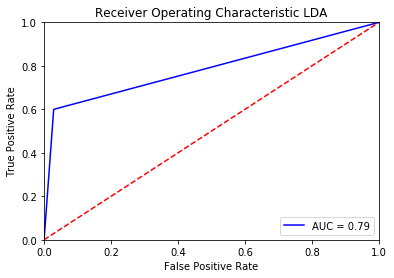

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import balanced_accuracy_score

####LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf_LDA = LinearDiscriminantAnalysis();
LDA_model = clf_LDA.fit(X_train, y_train)


y_predict = clf_LDA.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

scores = cross_val_score(clf_LDA, X_test, y_test, cv=10)

print('CV score LDA \t' + str(scores))

cm = confusion_matrix(y_test, y_predict)
print(cm)
print('Accuracy LDA \t' + str(accuracy_score(y_test, y_predict)))

b_acc = balanced_accuracy_score(y_test, y_predict)
print('Balanced Accuracy LDA \t' + str(b_acc))

sensitivity = float(cm[0,0])/float((cm[0,0]+cm[0,1]))
print('Sensitivity LDA \t' + str(sensitivity))

specificity = float(cm[1,1])/float((cm[1,0]+cm[1,1]))
print('Specificity LDA \t' + str(specificity))

from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_predict, average='micro')  
print('F-1 Score LDA \t' + str(f1))

import sklearn.metrics as metrics
# Compute ROC curve and ROC area for each class
fpr, tpr, threshold = metrics.roc_curve(y_test, y_predict)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic LDA')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

/cis/home/sphatak/hello_world_project/helloWorld/local/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


CV score QDA 	[0.8        0.8        0.8        0.73333333 0.66666667 0.73333333
 0.53333333 0.66666667 0.6        0.92857143]
[[139   0]
 [ 10   0]]
Accuracy QDA 	0.9328859060402684
Balanced Accuracy QA 	0.5
Sensitivity QDA 	1.0
Specificity QDA 	0.0
F-1 Score QDA 	0.9328859060402684


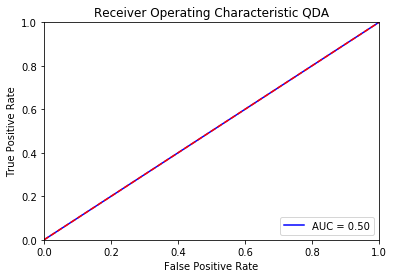

In [3]:
####QDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
clf_QDA = QuadraticDiscriminantAnalysis();
QDA_model = clf_QDA.fit(X_train, y_train)


y_predict = clf_QDA.predict(X_test)

scores = cross_val_score(clf_QDA, X_test, y_test, cv=10)

print('CV score QDA \t' + str(scores))

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_predict)
print(cm)
print('Accuracy QDA \t' + str(accuracy_score(y_test, y_predict)))

b_acc = balanced_accuracy_score(y_test, y_predict)
print('Balanced Accuracy QA \t' + str(b_acc))

sensitivity = float(cm[0,0])/float((cm[0,0]+cm[0,1]))
print('Sensitivity QDA \t' + str(sensitivity))

specificity = float(cm[1,1])/float((cm[1,0]+cm[1,1]))
print('Specificity QDA \t' + str(specificity))

from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_predict, average='micro')  
print('F-1 Score QDA \t' + str(f1))

import sklearn.metrics as metrics
# Compute ROC curve and ROC area for each class
fpr, tpr, threshold = metrics.roc_curve(y_test, y_predict)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic QDA')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

CV score SVM 	[0.93333333 0.93333333 0.93333333 0.93333333 0.93333333 0.93333333
 0.93333333 0.93333333 0.93333333 0.92857143]
[[139   0]
 [  6   4]]
Accuracy SVM 	0.959731543624161
Balanced Accuracy SVM 	0.7
Sensitivity SVM 	1.0
Specificity SVM 	0.4
F-1 Score SVM 	0.959731543624161


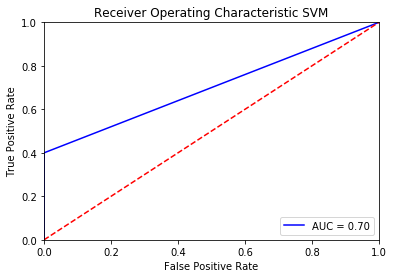

In [4]:
####SVM
from sklearn import svm
clf_SVM = svm.SVC(gamma='scale')

SVM_model = clf_SVM.fit(X_train, y_train)


y_predict = clf_SVM.predict(X_test)

scores = cross_val_score(clf_SVM, X_test, y_test, cv=10)

print('CV score SVM \t' + str(scores))

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_predict)
print(cm)
print('Accuracy SVM \t' + str(accuracy_score(y_test, y_predict)))

b_acc = balanced_accuracy_score(y_test, y_predict)
print('Balanced Accuracy SVM \t' + str(b_acc))

sensitivity = float(cm[0,0])/float((cm[0,0]+cm[0,1]))
print('Sensitivity SVM \t' + str(sensitivity))

specificity = float(cm[1,1])/float((cm[1,0]+cm[1,1]))
print('Specificity SVM \t' + str(specificity))

from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_predict, average='micro')  
print('F-1 Score SVM \t' + str(f1))

import sklearn.metrics as metrics
# Compute ROC curve and ROC area for each class
fpr, tpr, threshold = metrics.roc_curve(y_test, y_predict)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic SVM')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

CV score KNN 	[0.93333333 0.93333333 0.93333333 0.93333333 0.93333333 0.93333333
 0.93333333 0.93333333 0.93333333 0.92857143]
[[139   0]
 [  6   4]]
Accuracy KNN 	0.959731543624161
Balanced Accuracy KNN 	0.7
Sensitivity KNN 	1.0
Specificity KNN 	0.4
F-1 Score KNN 	0.959731543624161


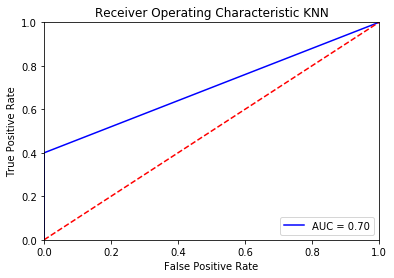

In [5]:
####KNN
from sklearn.neighbors import KNeighborsClassifier
clf_KNN = KNeighborsClassifier(n_neighbors=5)
clf_KNN.fit(X_train, y_train)

y_predict = clf_KNN.predict(X_test)

scores = cross_val_score(clf_KNN, X_test, y_test, cv=10)

print('CV score KNN \t' + str(scores))


cm = confusion_matrix(y_test, y_predict)
print(cm)
print('Accuracy KNN \t' + str(accuracy_score(y_test, y_predict)))

b_acc = balanced_accuracy_score(y_test, y_predict)
print('Balanced Accuracy KNN \t' + str(b_acc))

sensitivity = float(cm[0,0])/float((cm[0,0]+cm[0,1]))
print('Sensitivity KNN \t' + str(sensitivity))

specificity = float(cm[1,1])/float((cm[1,0]+cm[1,1]))
print('Specificity KNN \t' + str(specificity))

from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_predict, average='micro')  
print('F-1 Score KNN \t' + str(f1))

import sklearn.metrics as metrics
# Compute ROC curve and ROC area for each class
fpr, tpr, threshold = metrics.roc_curve(y_test, y_predict)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic KNN')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


/cis/home/sphatak/hello_world_project/helloWorld/local/lib/python2.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CV score RF 	[0.93333333 0.93333333 0.93333333 0.93333333 0.93333333 0.93333333
 0.93333333 0.93333333 0.93333333 0.92857143]
[[139   0]
 [ 10   0]]
Accuracy RF 	0.9328859060402684
Balanced Accuracy RF 	0.5
Sensitivity RF 	1.0
Specificity RF 	0.0
F-1 Score RF 	0.9328859060402684


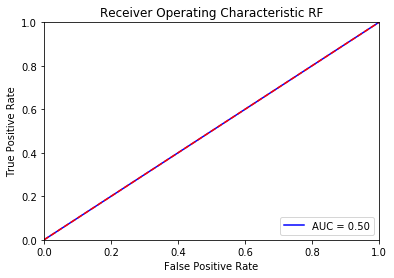

In [6]:
####RF
from sklearn.ensemble import RandomForestClassifier

clf_RF = RandomForestClassifier(max_depth=2, random_state=0)
clf_RF.fit(X_train, y_train)
y_predict = clf_RF.predict(X_test)

scores = cross_val_score(clf_RF, X_test, y_test, cv=10)

print('CV score RF \t' + str(scores))

cm = confusion_matrix(y_test, y_predict)
print(cm)
print('Accuracy RF \t' + str(accuracy_score(y_test, y_predict)))

b_acc = balanced_accuracy_score(y_test, y_predict)
print('Balanced Accuracy RF \t' + str(b_acc))

sensitivity = float(cm[0,0])/float((cm[0,0]+cm[0,1]))
print('Sensitivity RF \t' + str(sensitivity))

specificity = float(cm[1,1])/float((cm[1,0]+cm[1,1]))
print('Specificity RF \t' + str(specificity))

from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_predict, average='micro')  
print('F-1 Score RF \t' + str(f1))

import sklearn.metrics as metrics
# Compute ROC curve and ROC area for each class
fpr, tpr, threshold = metrics.roc_curve(y_test, y_predict)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic RF')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

CV score NN 	[0.93333333 0.86666667 0.86666667 0.93333333 0.93333333 0.93333333
 0.93333333 0.8        0.93333333 0.85714286]
[[138   1]
 [  4   6]]
Accuracy NN 	0.9664429530201343
Balanced Accuracy NN 	0.7964028776978418
Sensitivity NN 	0.992805755396
Specificity NN 	0.6
F-1 Score NN 	0.9664429530201343


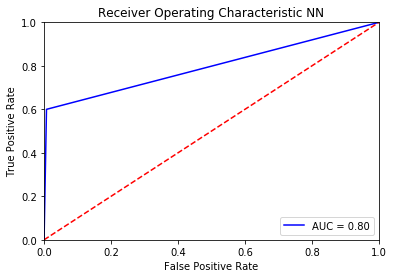

In [7]:
###Neural Networks
from sklearn.neural_network import MLPClassifier

clf_NN = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)

clf_NN.fit(X_train,y_train);
y_predict = clf_NN.predict(X_test)

scores = cross_val_score(clf_NN, X_test, y_test, cv=10)

print('CV score NN \t' + str(scores))

cm = confusion_matrix(y_test, y_predict)
print(cm)
print('Accuracy NN \t' + str(accuracy_score(y_test, y_predict)))

b_acc = balanced_accuracy_score(y_test, y_predict)
print('Balanced Accuracy NN \t' + str(b_acc))

sensitivity = float(cm[0,0])/float((cm[0,0]+cm[0,1]))
print('Sensitivity NN \t' + str(sensitivity))

specificity = float(cm[1,1])/float((cm[1,0]+cm[1,1]))
print('Specificity NN \t' + str(specificity))

from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_predict, average='micro')  
print('F-1 Score NN \t' + str(f1))

import sklearn.metrics as metrics
# Compute ROC curve and ROC area for each class
fpr, tpr, threshold = metrics.roc_curve(y_test, y_predict)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic NN')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [8]:
####PCA reducing dimensions
from sklearn.decomposition import PCA

pca = PCA(n_components=10)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

CV score LDA 	[0.93333333 0.86666667 0.93333333 0.93333333 0.93333333 0.93333333
 0.93333333 0.93333333 0.93333333 0.85714286]
[[135   4]
 [  9   1]]
Accuracy LDA 	0.912751677852349
Balanced Accuracy LDA 	0.5356115107913669
Sensitivity LDA 	0.971223021583
Specificity LDA 	0.1
F-1 Score LDA 	0.912751677852349


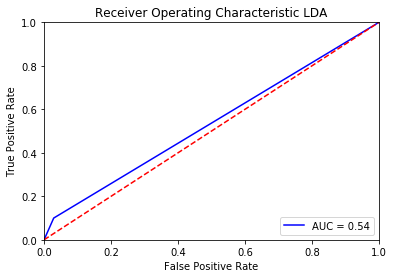

In [9]:
####LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf_LDA = LinearDiscriminantAnalysis();
LDA_model = clf_LDA.fit(X_train_pca, y_train)


y_predict = clf_LDA.predict(X_test_pca)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

scores = cross_val_score(clf_LDA, X_test_pca, y_test, cv=10)

print('CV score LDA \t' + str(scores))

cm = confusion_matrix(y_test, y_predict)
print(cm)
print('Accuracy LDA \t' + str(accuracy_score(y_test, y_predict)))

b_acc = balanced_accuracy_score(y_test, y_predict)
print('Balanced Accuracy LDA \t' + str(b_acc))

sensitivity = float(cm[0,0])/float((cm[0,0]+cm[0,1]))
print('Sensitivity LDA \t' + str(sensitivity))

specificity = float(cm[1,1])/float((cm[1,0]+cm[1,1]))
print('Specificity LDA \t' + str(specificity))

from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_predict, average='micro')  
print('F-1 Score LDA \t' + str(f1))

import sklearn.metrics as metrics
# Compute ROC curve and ROC area for each class
fpr, tpr, threshold = metrics.roc_curve(y_test, y_predict)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic LDA')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

CV score QDA 	[0.93333333 0.93333333 0.93333333 0.93333333 0.93333333 0.93333333
 0.93333333 0.93333333 0.93333333 0.92857143]
[[137   2]
 [  5   5]]
Accuracy QDA 	0.9530201342281879
Balanced Accuracy QA 	0.7428057553956835
Sensitivity QDA 	0.985611510791
Specificity QDA 	0.5
F-1 Score QDA 	0.9530201342281879


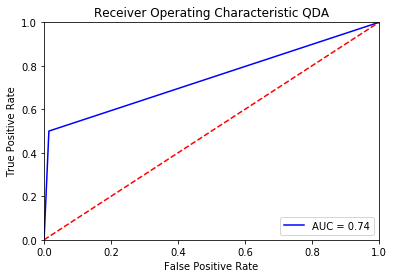

In [10]:
####QDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
clf_QDA = QuadraticDiscriminantAnalysis();
QDA_model = clf_QDA.fit(X_train_pca, y_train)


y_predict = clf_QDA.predict(X_test_pca)

scores = cross_val_score(clf_QDA, X_test_pca, y_test, cv=10)

print('CV score QDA \t' + str(scores))

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_predict)
print(cm)
print('Accuracy QDA \t' + str(accuracy_score(y_test, y_predict)))

b_acc = balanced_accuracy_score(y_test, y_predict)
print('Balanced Accuracy QA \t' + str(b_acc))

sensitivity = float(cm[0,0])/float((cm[0,0]+cm[0,1]))
print('Sensitivity QDA \t' + str(sensitivity))

specificity = float(cm[1,1])/float((cm[1,0]+cm[1,1]))
print('Specificity QDA \t' + str(specificity))

from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_predict, average='micro')  
print('F-1 Score QDA \t' + str(f1))

import sklearn.metrics as metrics
# Compute ROC curve and ROC area for each class
fpr, tpr, threshold = metrics.roc_curve(y_test, y_predict)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic QDA')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

CV score SVM 	[0.93333333 0.93333333 0.93333333 0.93333333 0.93333333 0.93333333
 0.93333333 0.93333333 0.93333333 0.92857143]
[[139   0]
 [  7   3]]
Accuracy SVM 	0.9530201342281879
Balanced Accuracy SVM 	0.65
Sensitivity SVM 	1.0
Specificity SVM 	0.3
F-1 Score SVM 	0.9530201342281879


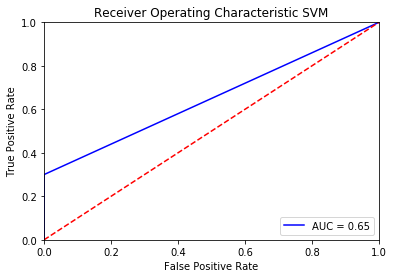

In [11]:
####SVM
from sklearn import svm
clf_SVM = svm.SVC(gamma='scale')

SVM_model = clf_SVM.fit(X_train_pca, y_train)


y_predict = clf_SVM.predict(X_test_pca)

scores = cross_val_score(clf_SVM, X_test_pca, y_test, cv=10)

print('CV score SVM \t' + str(scores))

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_predict)
print(cm)
print('Accuracy SVM \t' + str(accuracy_score(y_test, y_predict)))

b_acc = balanced_accuracy_score(y_test, y_predict)
print('Balanced Accuracy SVM \t' + str(b_acc))

sensitivity = float(cm[0,0])/float((cm[0,0]+cm[0,1]))
print('Sensitivity SVM \t' + str(sensitivity))

specificity = float(cm[1,1])/float((cm[1,0]+cm[1,1]))
print('Specificity SVM \t' + str(specificity))

from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_predict, average='micro')  
print('F-1 Score SVM \t' + str(f1))

import sklearn.metrics as metrics
# Compute ROC curve and ROC area for each class
fpr, tpr, threshold = metrics.roc_curve(y_test, y_predict)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic SVM')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

CV score KNN 	[0.93333333 0.93333333 0.93333333 0.93333333 0.93333333 0.93333333
 0.93333333 0.93333333 0.93333333 0.92857143]
[[139   0]
 [  6   4]]
Accuracy KNN 	0.959731543624161
Balanced Accuracy KNN 	0.7
Sensitivity KNN 	1.0
Specificity KNN 	0.4
F-1 Score KNN 	0.959731543624161


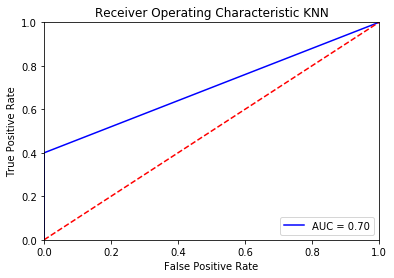

In [12]:
####KNN
from sklearn.neighbors import KNeighborsClassifier
clf_KNN = KNeighborsClassifier(n_neighbors=5)
clf_KNN.fit(X_train_pca, y_train)

y_predict = clf_KNN.predict(X_test_pca)

scores = cross_val_score(clf_KNN, X_test_pca, y_test, cv=10)

print('CV score KNN \t' + str(scores))


cm = confusion_matrix(y_test, y_predict)
print(cm)
print('Accuracy KNN \t' + str(accuracy_score(y_test, y_predict)))

b_acc = balanced_accuracy_score(y_test, y_predict)
print('Balanced Accuracy KNN \t' + str(b_acc))

sensitivity = float(cm[0,0])/float((cm[0,0]+cm[0,1]))
print('Sensitivity KNN \t' + str(sensitivity))

specificity = float(cm[1,1])/float((cm[1,0]+cm[1,1]))
print('Specificity KNN \t' + str(specificity))

from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_predict, average='micro')  
print('F-1 Score KNN \t' + str(f1))

import sklearn.metrics as metrics
# Compute ROC curve and ROC area for each class
fpr, tpr, threshold = metrics.roc_curve(y_test, y_predict)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic KNN')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


CV score RF 	[0.93333333 0.93333333 0.93333333 0.93333333 0.93333333 0.93333333
 0.93333333 0.93333333 0.93333333 0.92857143]
[[139   0]
 [  9   1]]
Accuracy RF 	0.9395973154362416
Balanced Accuracy RF 	0.55
Sensitivity RF 	1.0
Specificity RF 	0.1
F-1 Score RF 	0.9395973154362416


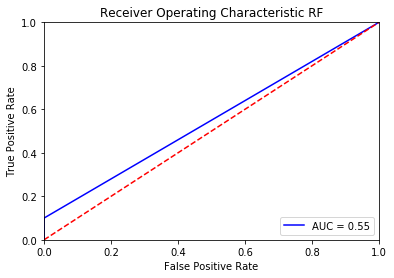

In [13]:
####RF
from sklearn.ensemble import RandomForestClassifier

clf_RF = RandomForestClassifier(max_depth=2, random_state=0)
clf_RF.fit(X_train_pca, y_train)
y_predict = clf_RF.predict(X_test_pca)

scores = cross_val_score(clf_RF, X_test_pca, y_test, cv=10)

print('CV score RF \t' + str(scores))

cm = confusion_matrix(y_test, y_predict)
print(cm)
print('Accuracy RF \t' + str(accuracy_score(y_test, y_predict)))

b_acc = balanced_accuracy_score(y_test, y_predict)
print('Balanced Accuracy RF \t' + str(b_acc))

sensitivity = float(cm[0,0])/float((cm[0,0]+cm[0,1]))
print('Sensitivity RF \t' + str(sensitivity))

specificity = float(cm[1,1])/float((cm[1,0]+cm[1,1]))
print('Specificity RF \t' + str(specificity))

from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_predict, average='micro')  
print('F-1 Score RF \t' + str(f1))

import sklearn.metrics as metrics
# Compute ROC curve and ROC area for each class
fpr, tpr, threshold = metrics.roc_curve(y_test, y_predict)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic RF')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

CV score NN 	[0.93333333 0.93333333 0.93333333 0.93333333 0.93333333 0.93333333
 0.93333333 0.93333333 0.93333333 0.92857143]
[[139   0]
 [ 10   0]]
Accuracy NN 	0.9328859060402684
Balanced Accuracy NN 	0.5
Sensitivity NN 	1.0
Specificity NN 	0.0
F-1 Score NN 	0.9328859060402684


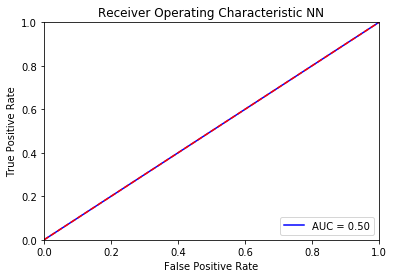

In [14]:
###Neural Networks
from sklearn.neural_network import MLPClassifier

clf_NN = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)

clf_NN.fit(X_train_pca,y_train);
y_predict = clf_NN.predict(X_test_pca)

scores = cross_val_score(clf_NN, X_test_pca, y_test, cv=10)

print('CV score NN \t' + str(scores))

cm = confusion_matrix(y_test, y_predict)
print(cm)
print('Accuracy NN \t' + str(accuracy_score(y_test, y_predict)))

b_acc = balanced_accuracy_score(y_test, y_predict)
print('Balanced Accuracy NN \t' + str(b_acc))

sensitivity = float(cm[0,0])/float((cm[0,0]+cm[0,1]))
print('Sensitivity NN \t' + str(sensitivity))

specificity = float(cm[1,1])/float((cm[1,0]+cm[1,1]))
print('Specificity NN \t' + str(specificity))

from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_predict, average='micro')  
print('F-1 Score NN \t' + str(f1))

import sklearn.metrics as metrics
# Compute ROC curve and ROC area for each class
fpr, tpr, threshold = metrics.roc_curve(y_test, y_predict)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic NN')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()